In [42]:
import os
import re
from collections import defaultdict

import pandas as pd

data = defaultdict(list)
addresses = []

# When we grab the date from the URL. It is hidden in the form '{year}/{month}`.
date_pattern = re.compile(r'\d{4}/\d{2}')

article_path = '../articles/'

for file in os.listdir(article_path):
    with open('../articles/{}'.format(file), 'r') as f:
        address = f.readlines()[0]
        if address not in addresses:
            addresses.append(address)
            f.seek(0)
            data['text'].append(' '.join(f.readlines()[2:]))
            try:
                d = date_pattern.search(address).group(0)
                data['date'].append(d)
            except:
                print("There was an error processing the following address: {}".format(address))
                print("This was located in the file: {}".format(f))
                date.append(None)
        else:
            print("Article at {} already loaded. Skipping.".format(address))

df = pd.DataFrame(data=data)

# Add a month and year column.
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month

Article at https://www.theatlantic.com/magazine/archive/2019/03/how-humans-tamed-themselves/580447/
 already loaded. Skipping.
Article at https://www.theatlantic.com/magazine/archive/2019/03/how-humans-tamed-themselves/580447/
 already loaded. Skipping.
Article at https://www.theatlantic.com/magazine/archive/2019/03/how-humans-tamed-themselves/580447/
 already loaded. Skipping.
Article at https://www.theatlantic.com/magazine/archive/2019/03/bryan-singers-accusers-speak-out/580462/
 already loaded. Skipping.
Article at https://www.theatlantic.com/magazine/archive/2019/03/how-humans-tamed-themselves/580447/
 already loaded. Skipping.
Article at https://www.theatlantic.com/magazine/archive/2019/03/how-humans-tamed-themselves/580447/
 already loaded. Skipping.
Article at https://www.theatlantic.com/magazine/archive/2019/03/how-humans-tamed-themselves/580447/
 already loaded. Skipping.
Article at https://www.theatlantic.com/magazine/archive/2019/03/bryan-singers-accusers-speak-out/580462/
 

Article at https://www.theatlantic.com/magazine/archive/2013/11/innovations-list/309536/
 already loaded. Skipping.
Article at https://www.theatlantic.com/magazine/archive/2013/12/theyre-watching-you-at-work/354681/
 already loaded. Skipping.
Article at https://www.theatlantic.com/magazine/archive/2019/03/how-humans-tamed-themselves/580447/
 already loaded. Skipping.
Article at https://www.theatlantic.com/magazine/archive/2019/03/bryan-singers-accusers-speak-out/580462/
 already loaded. Skipping.
Article at https://www.theatlantic.com/magazine/archive/2019/03/bryan-singers-accusers-speak-out/580462/
 already loaded. Skipping.
Article at https://www.theatlantic.com/magazine/archive/2013/04/the-touch-screen-generation/309250/
 already loaded. Skipping.
Article at https://www.theatlantic.com/magazine/archive/2018/07/when-a-child-says-shes-trans/561749/
 already loaded. Skipping.
Article at https://www.theatlantic.com/magazine/archive/2019/03/bryan-singers-accusers-speak-out/580462/
 alrea

In [43]:
df_election = df[df['year'] == 2016]

In [3]:
text_by_month = dict()

for month in range(1, 12 + 1):
    text_by_month[month] = df_election[df_election['month']==month]['text'].values

In [15]:
import re

political_re = re.compile('(Trump|Clinton|Hillary|Donald)')
for text_array in text_by_month:
    text_array = np.array([text for text in text_by_month[1] if re.match(political_re, text)])

In [17]:
text_by_month

{1: array([], dtype=float64),
 2: array([], dtype=object),
 3: array(["A poem \xa0 \xa0 \xa0 \xa0 \xa0 \xa0First it flies to a side rail. Then a fern. Then a fern, like a fountain, spilling out. \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 Can a curse be said to be song? Can it? How can such a quick thing, tail tipped up, brown \xa0 \xa0 \xa0 \xa0 \xa0 \xa0as a bun, on wings too busy to see, be so badly named? Troglodytidae. \xa0 \xa0 \xa0 \xa0 \xa0 \xa0The term circles back to us—cave dweller, brute recluse. Though a wren's beak curves, like a \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 scimitar, this one just wants its porch back. Now it’s vanished down our hollow eave spout, \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 from whose depths returns— \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 says the book—a loud and often complex song. No, it is a curse. We want to hear what you think about this article.  ",
        'The new Daily Show host, Trevor Noah, is smooth and charming, but he hasn’t f

In [18]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from bokeh.plotting import figure, show
from bokeh.io import output_notebook

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

def plot_frequent_word(count_vec, subtitle, feature_names):
    zipped = list(zip(feature_names, count_vec))
    x, y = (list(x) for x in zip(*sorted(zipped, key=lambda x: x[1], reverse=True)))
    X = np.concatenate([x[0:15], x[-16:-1]])
    Y = np.concatenate([y[0:15], y[-16:-1]])
    # Plotting the Plot.ly plot for the Top 50 word frequencies
    data = [go.Bar(
                x = x[0:50],
                y = y[0:50],
                marker= dict(colorscale='Jet',
                             color = y[0:50]
                            ),
                text='Tfidf Value'
        )]
    layout = go.Layout(
    title='Top 50 Tfidf frequencies (%s)' % (subtitle)
    )

    fig = go.Figure(data=data, layout=layout)

    py.iplot(fig, filename='basic-bar')

In [20]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

tf_vectorizer = dict()
tf = dict()
feature_names = dict()
count_vec = dict()

tf_vectorizer = dict()
tf = dict()
feature_names = dict()
count_vec = dict()

MONTHS = list(range(1, 12 + 1))
MONTHS.remove(2)
MONTHS.remove(8)

for month in MONTHS:
    try:
        txt = text_by_month[month]

        tf_vectorizer[month] = TfidfVectorizer(max_df=0.95,
                                            min_df=2,
                                            stop_words='english',
                                            decode_error='ignore')

        tf[month] = tf_vectorizer[month].fit_transform(txt)

        feature_names[month] = tf_vectorizer[month].get_feature_names()

        count_vec[month] = np.asarray(tf[month].sum(axis=0)).ravel()

        plot_frequent_word(count_vec[month], "month {}".format(month), feature_names[month])
    
    except:
        pass

In [50]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)

In [21]:
from sklearn.decomposition import NMF, LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=5, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

for month in MONTHS:
    try:
        lda.fit(tf[month])

        print("For the month of {}, the top five topics:".format(month))
        print_top_words(lda, feature_names[month], 20)
        print("")
    
    except:
        pass

For the month of 3, the top five topics:
For the month of 4, the top five topics:
For the month of 5, the top five topics:
For the month of 6, the top five topics:
For the month of 7, the top five topics:
For the month of 9, the top five topics:
For the month of 10, the top five topics:
For the month of 11, the top five topics:
For the month of 12, the top five topics:


In [51]:
def word_count(month, word):
    ind = feature_names[month].index(word)
    return count_vec[month][ind]

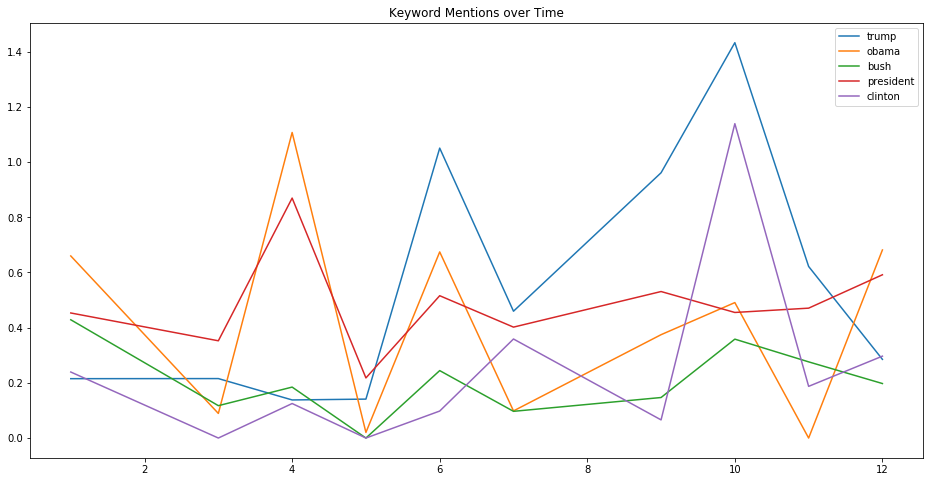

In [54]:
import matplotlib.pyplot as plt

words = ['trump', 'obama', 'bush', 'president', 'clinton']

x = np.array(MONTHS)
word_counts = defaultdict(list)

for word in words:
    for month in MONTHS:
        try:
            word_counts[word].append(word_count(month, word))
        except:
            word_counts[word].append(0)

plt.figure(figsize=(16, 8))

for word in words:
    y = np.array(word_counts[word])
    
    plt.plot(x, y)
    
plt.title("Keyword Mentions over Time")
plt.legend(words)

## Articles Involving The Election

In [44]:
text_involving_trump = df_election[df_election['text'].str.contains(r'(Trump|Clinton)')]

/home/frank/.anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning:

This pattern has match groups. To actually get the groups, use str.extract.



In [45]:
text_involving_trump

,text,date,year,month
41,Hillary Clinton’s candidacy has provoked a wav...,2016/10,2016,10
107,"In recent years, the idea that educators shoul...",2016/06,2016,6
156,“Rufus Gifford is a rock star.” When Rufus Gif...,2016/10,2016,10
162,Eugene Puryear explains why Sanders isn’t revo...,2016/05,2016,5
171,"The new Daily Show host, Trevor Noah, is smoot...",2016/03,2016,3
196,"For an influential group of writers, the purpo...",2016/04,2016,4
202,Embracing white nativism in the 1990s turned t...,2016/07,2016,7
204,Who will win the debates? Trump’s approach was...,2016/10,2016,10
303,For the third time since The Atlantic’s foundi...,2016/11,2016,11
315,His great accomplishment was to be indicted fo...,2016/10,2016,10


In [46]:
text_by_month = dict()

for month in MONTHS:
    text_by_month[month] = text_involving_trump[text_involving_trump['month']==month]['text'].values

In [47]:
tf_vectorizer = dict()
tf = dict()
feature_names = dict()
count_vec = dict()

tf_vectorizer = dict()
tf = dict()
feature_names = dict()
count_vec = dict()

MONTHS = list(range(1, 12 + 1))
MONTHS.remove(2)
MONTHS.remove(8)

for month in MONTHS:
    try:
        txt = text_by_month[month]

        tf_vectorizer[month] = TfidfVectorizer(max_df=0.95,
                                            min_df=2,
                                            stop_words='english',
                                            decode_error='ignore')

        tf[month] = tf_vectorizer[month].fit_transform(txt)

        feature_names[month] = tf_vectorizer[month].get_feature_names()

        count_vec[month] = np.asarray(tf[month].sum(axis=0)).ravel()

        plot_frequent_word(count_vec[month], "month {}".format(month), feature_names[month])
    
    except:
        pass

In [51]:
for month in MONTHS:
    try:
        lda.fit(tf[month])

        print("For the month of {}, the top five topics:".format(month))
        print_top_words(lda, feature_names[month], 20)
        print("")
    
    except:
        pass

For the month of 1, the top five topics:
Topic #0: protohumans program information really raised benefit expression file spanish generation chair unclear enjoy carried versus battled says consider proud angry
Topic #1: policies pressure ryan war stress kroeger measure 52 came generation academic federal attribute hoping agricultural alike eaten spots money education
Topic #2: particular insulated west inspired scale rupert influential jr prevent car club period charge september door confused mccoy robert independent distinguish
Topic #3: second undercut discarded economics december letter deep path camp voted keen administration strategist study margins 30 minimum capitalism expose russian
Topic #4: happy leading club excessive loose laws account statehouses park publicly assumptions responded assortment showed inside independent items mines candidate anti

For the month of 3, the top five topics:
Topic #0: robert returned leads self scenes tech world born focused generation coaches hi

In [52]:
all_text_election = text_involving_trump['text'].values

In [57]:
for components in range(2, 10):
    print("For {} Components".format(components))
    lda = LatentDirichletAllocation(n_components=components, max_iter=5,
                                    learning_method='online',
                                    learning_offset=50.,
                                    random_state=0)

    tf_vectorizer = TfidfVectorizer(max_df=0.95,
                                                min_df=2,
                                                stop_words='english',
                                                decode_error='ignore')

    tf = tf_vectorizer.fit_transform(all_text_election)

    feature_names = tf_vectorizer.get_feature_names()

    count_vec = np.asarray(tf.sum(axis=0)).ravel()

    lda.fit(tf)
    print_top_words(lda, feature_names, 20)
    print('\n\n')

For 2 Components
Topic #0: obama people president time years china way trump percent says 000 just told don hours home party man year american
Topic #1: water trump clinton apt outrageous time pee 55 american plain seemingly enable tradition donald acres proust chambers people homosexuals university



For 3 Components
Topic #0: obama people time years president china trump way percent says just told 000 american don home said man hours party
Topic #1: water apt outrageous pee 55 plain enable seemingly acres tradition homosexuals proust softly watches perseverance harassment mandatory disturbances chambers lower
Topic #2: scheduling footprint gulf paralyzed people bidding flush round orbiting september rigorous rights load typical negotiators innocent past comprehensively repetitive appealed



For 4 Components
Topic #0: people obama time years president china percent trump way says 000 just told black home don american hours man today
Topic #1: water apt outrageous pee 55 plain enable

In [60]:
[x for x in all_text_election if 'pee ' in x.lower()]

['A hotly contested, supposedly ancient manuscript suggests Christ was married. But believing its origin story—a real-life Da Vinci Code, involving a Harvard professor, a onetime Florida pornographer, and an escape from East Germany—requires a big leap of faith. On a humid afternoon this past November, I pulled off Interstate 75 into a stretch of Florida pine forest tangled with runaway vines. My GPS was homing in on the house of a man I thought might hold the master key to one of the strangest scholarly mysteries in recent decades: a 1,300-year-old scrap of papyrus that bore the phrase “Jesus said to them, My wife.” The fragment, written in the ancient language of Coptic, had set off shock waves when an eminent Harvard historian of early Christianity, Karen L. King, presented it in September 2012 at a conference in Rome. Listen to the audio version of this article:Feature stories, read aloud: download the Audm app for your iPhone. Never before had an ancient manuscript alluded to Jesu